# Problem Statement
On April 28, 2020, the United States has confirmed a staggering total of more than 1 million COVID-19 cases and leads the world with the most confirmed cases (at the time of writing).  Some obvious question to ask is how did it get this bad so fast and what can we do now to prevent the spread to continue growing exponentially.  I would argue a critical factor to this growth would be the effectiveness of our public health policy and government response in curbing the spread of COVID-19.  Most interestingly, the United States lacks a national public health guideline and has left the states to develop their own course of action in handling the coronavirus.  In this project I would be modeling the effectiveness of different state governments' health policy and actions in reducing the growth factor of COVID-19.

### Input Dataset
The input dataset was sourced from John Hopkin University CSSE, Kaiser Family Foundation, and Wikipedia for general US statistics.  Since some of the features are calculated in respect to the first recorded infection case and this is not a readily found statistic, I simplified the date of the first infection to be February 1 for all states as this is the date of when the number of coronavirus cases began to spike in the US.  Each example of the dataset corresponds to one of the 50 states of the United States.  A description of each feature in a given example are as follow:

* Testing rate - Total number of people tested per 100,000 persons
* Time between State of emergency declared: Time (in days) between State of emergency declared and first recorded infection case
* Time between stay-at-home ordered: Time (in days) between stay-at-home ordered and first recorded infection case
* Maximum gathering size - Size of maximum number of people gathered in a public/private setting
* Out-of-state travel restrictions - {1 = NONE, 2 = LIMITED, 3 = ENFORCED}
* School closures ordered - {-1 = NONE, 1 = ENFORCED}
* Daycares closures ordered - {-1 = NONE, 1 = ENFORCED}
* Restaurants closures ordered - {-1 = NONE, 1 = ENFORCED}
* Non-essential retail closures ordered - {-1 = NONE, 1 = ENFORCED}
* Waive cost sharing for COVID-19 treatment - {1 = NONE, 2 = STATE-INSURER AGREEMENT, 3 = REQUIRED} 
* Free cost vaccine when available - {1 = NONE, 2 = STATE-INSURER AGREEMENT, 3 = REQUIRED}
* Paid sick leave - {1 = NONE, 2 = PROPOSED, 3 = ENACTED}
* Population density - Total population / Land area of state (per km^2)

###### Sources
Features 1 is sourced from [JHU CSSE COVID-19 repository for US daily state reports on May 7, 2020](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-07-2020.csv).

Features 2-9 is sourced from [Wikipedia page for U.S. state and local government response to the COVID-19 pandemic](https://en.wikipedia.org/wiki/U.S._state_and_local_government_response_to_the_COVID-19_pandemic).

Features 10-12 is sourced from [Kaiser Family Foundation report on State Data and Policy Actions to Address Coronoavirus](https://www.kff.org/health-costs/issue-brief/state-data-and-policy-actions-to-address-coronavirus/).

Feature 13 is sourced from [Wikipedia page for List of states and territories of the United States by population density for state's population density in 2015](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population_density).

### Output Model
The goal for this model is to characterize the effectiveness of different health policy and state's responses measured by the growth factor of the virus.  With this model, we can measure how effective a hypothetical set of state's action would be and then identify a set of practices would be most influential in minimizing the spread of COVID-19.  

# Preparing the dataset
### JHU CSSE 

In [302]:
import pandas as pd

jhu_df = pd.read_csv('JHU_05-07-2020.csv')
print(jhu_df.columns.values)

['Province_State' 'Country_Region' 'Last_Update' 'Lat' 'Long_' 'Confirmed'
 'Deaths' 'Recovered' 'Active' 'FIPS' 'Incident_Rate' 'People_Tested'
 'People_Hospitalized' 'Mortality_Rate' 'UID' 'ISO3' 'Testing_Rate'
 'Hospitalization_Rate']


In [303]:
jhu_df.drop(columns=['Hospitalization_Rate', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'], inplace=True)

# manually drop US territories/other entities that are not US states
jhu_df.drop([2, 9, 10, 13, 14, 39, 44, 52], inplace=True)

In [304]:
jhu_df

,Province_State,Testing_Rate
0,Alabama,2456.291959
1,Alaska,4072.110535
3,Arizona,1526.175561
4,Arkansas,2317.279812
5,California,2149.716057
6,Colorado,1611.964256
7,Connecticut,3258.475405
8,Delaware,2806.224095
11,Florida,2321.665084
12,Georgia,2143.155907


In [305]:
jhu_df.reset_index(drop=True, inplace=True)
jhu_df.drop(columns="Province_State", inplace=True)
jhu_df

,Testing_Rate
0,2456.291959
1,4072.110535
2,1526.175561
3,2317.279812
4,2149.716057
5,1611.964256
6,3258.475405
7,2806.224095
8,2321.665084
9,2143.155907


### State-level regulation

In [306]:
state_reg_df = pd.read_csv('state-level-regulations.csv')
state_reg_df
#state_reg_df.columns.values

,State/territory,State of emergency declared,Stay at home ordered,Gatherings banned,Out-of-state travel restrictions,Schools closures ordered,Daycares closures ordered,Restaurants closures ordered,Non-essential retail closures ordered
0,Alabama,March 13,April 4,10 or more,No,Yes (remainder of term),Yes,Yes,Yes
1,Alaska,March 11,March 28,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes
2,Arizona,March 11,March 31,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes
3,Arkansas,March 11,No,10 or more,No,Yes (remainder of term),Yes,Yes,Regional
4,California,March 4,March 19,All,No,Yes (remainder of term),Yes,Yes,Yes
5,Colorado,March 10,March 26,10 or more,No,Yes (remainder of term),Restricted,Yes,Yes
6,Connecticut,March 10,March 23,All,Recommended quarantine,Yes (remainder of term),Yes,Yes,Yes
7,Delaware,March 12,March 24,All,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes
8,Florida,March 1,April 3,10 or more,Limited quarantine / Screened,Yes (remainder of term),Yes,Yes,Yes
9,Georgia,March 14,April 3,10 or more,No,Yes (remainder of term),No,Yes,Yes


In [307]:
import datetime as dt

def count_num_of_days(date, start=dt.date(2020, 2, 1)):
    invalid = set({'No', 'Regional'})
    if date in invalid:
        # return number of days from February 1 to May 7 -> 96 days
        return 96
    
    month, day = date.split()[:2]
    d = dt.date(2020, 3 if month == 'March' else 4, int(day))
    delta = d - start
    return delta.days
    
state_reg_df['State of emergency declared'] = state_reg_df['State of emergency declared'].apply(count_num_of_days)
state_reg_df['Stay at home ordered'] = state_reg_df['Stay at home ordered'].apply(count_num_of_days)

In [308]:
import string

def parse_int_if_from_string(input_string):
    input_string = input_string.replace(" ", "")
    input_string = input_string.replace(",", "")
    input_string = input_string.replace("(", "")
    input_string = input_string.replace(")", "")
    res = input_string.strip(string.ascii_letters)
    if res == '':
        # only if all gatherings are banned
        return 0
    return int(res)

state_reg_df['Gatherings banned'] = state_reg_df['Gatherings banned'].apply(parse_int_if_from_string)

In [309]:
d1 = {"No": 1,
      "Regional": 1,
      "Limited quarantine": 2, 
      "Recommended quarantine": 2, 
      "Limited quarantine / Screened": 2,
      "Mandatory quarantine": 3
     }

state_reg_df["Out-of-state travel restrictions"].replace(d1, inplace=True)

In [310]:
d2 = {'Yes (districts choice)': 1, 
      'Yes (remainder of term)': 1
     }

state_reg_df["Schools closures ordered"].replace(d2, inplace=True)

In [311]:
d3 = {'No' : -1, 
      'Restricted': 1, 
      'Yes': 1
     }

state_reg_df["Daycares closures ordered"].replace(d3, inplace=True)

In [312]:
state_reg_df["Restaurants closures ordered"].replace(d3, inplace=True)

In [313]:
d4 = {'No': -1, 
      'Regional': -1, 
      'Restricted': 1, 
      'Yes': 1
     }
state_reg_df["Non-essential retail closures ordered"].replace(d4, inplace=True)

In [314]:
state_reg_df.drop(columns="State/territory", inplace=True)
state_reg_df

,State of emergency declared,Stay at home ordered,Gatherings banned,Out-of-state travel restrictions,Schools closures ordered,Daycares closures ordered,Restaurants closures ordered,Non-essential retail closures ordered
0,41,63,10,1,1,1,1,1
1,39,56,10,3,1,1,1,1
2,39,59,50,2,1,1,1,1
3,39,96,10,1,1,1,1,-1
4,32,47,0,1,1,1,1,1
5,38,54,10,1,1,1,1,1
6,38,51,0,2,1,1,1,1
7,40,52,0,3,1,1,1,1
8,29,62,10,2,1,1,1,1
9,42,62,10,1,1,-1,1,1


### KFF Policy Actions

In [315]:
kff_df = pd.read_csv("KFF_data.csv")
kff_df

,Location,Waive Cost Sharing for COVID-19 Treatment,Free Cost Vaccine When Available,Paid Sick Leave
0,Alabama,-,-,-
1,Alaska,-,-,-
2,Arizona,-,-,Enacted
3,Arkansas,-,-,-
4,California,-,-,Enacted
5,Colorado,-,-,Enacted
6,Connecticut,-,-,Enacted
7,Delaware,-,-,-
8,Florida,-,-,-
9,Georgia,-,-,-


In [316]:
d1 = {'-': 1, 
      'State-Insurer Agreement': 2,
      'State Requires': 3
     }

kff_df["Waive Cost Sharing for COVID-19 Treatment"].replace(d1, inplace=True)

In [317]:
kff_df["Free Cost Vaccine When Available"].replace(d1, inplace=True)

In [318]:
#set({row for row in kff_df["Paid Sick Leave"]})
d2 = {'-': 1,  
      'Proposed - March 2020': 2,
      'Enacted' :3,
     }

kff_df["Paid Sick Leave"].replace(d2, inplace=True)

In [319]:
kff_df.drop(columns="Location", inplace=True)
kff_df

,Waive Cost Sharing for COVID-19 Treatment,Free Cost Vaccine When Available,Paid Sick Leave
0,1,1,1
1,1,1,1
2,1,1,3
3,1,1,1
4,1,1,3
5,1,1,3
6,1,1,3
7,1,1,1
8,1,1,1
9,1,1,1


### US Population Density

In [320]:
pd_df = pd.read_csv("US state population density.csv")
pd_df.drop(columns="State etc.", inplace=True)
pd_df

,Population density
0,37
1,0
2,23
3,22
4,97
5,20
6,286
7,187
8,145
9,68


### Create input dataset

In [321]:
df = pd.concat([jhu_df, state_reg_df, kff_df, pd_df], axis=1, sort=False)
df

,Testing_Rate,State of emergency declared,Stay at home ordered,Gatherings banned,Out-of-state travel restrictions,Schools closures ordered,Daycares closures ordered,Restaurants closures ordered,Non-essential retail closures ordered,Waive Cost Sharing for COVID-19 Treatment,Free Cost Vaccine When Available,Paid Sick Leave,Population density
0,2456.291959,41,63,10,1,1,1,1,1,1,1,1,37
1,4072.110535,39,56,10,3,1,1,1,1,1,1,1,0
2,1526.175561,39,59,50,2,1,1,1,1,1,1,3,23
3,2317.279812,39,96,10,1,1,1,1,-1,1,1,1,22
4,2149.716057,32,47,0,1,1,1,1,1,1,1,3,97
5,1611.964256,38,54,10,1,1,1,1,1,1,1,3,20
6,3258.475405,38,51,0,2,1,1,1,1,1,1,3,286
7,2806.224095,40,52,0,3,1,1,1,1,1,1,1,187
8,2321.665084,29,62,10,2,1,1,1,1,1,1,1,145
9,2143.155907,42,62,10,1,1,-1,1,1,1,1,1,68


In [322]:
data = df.to_numpy()
data.shape

(50, 13)

# Minimally Complex Model - Linear Regression
### Calculate target values
Before we apply a minimally complex model, we need to calculate the growth factor (target) values for each data point.  Exponential growth can be used to model the number of confirmed cases of COVID-19 in the following equation:
<center>$N_d = N_o(1 + r)^d = N_ob^d$</center>

where $N_d$ is the number of new infection cases after $d$ days, $N_o$ is the number of infection at day 0, $r$ is growth rate, $b = 1 + r$ is growth factor, and $d$ is number of days after day 0. However, exponential growth is only an approximate model for the initial trend of growth.  Over time, the number of confirmed infected cases is best represented as a logistic curve.  Since our current data points are repsentative of the early stages of a logistic curve, we will make use of the above exponential growth equation to calculate for an approximate growth factor.  Since this is to model the growth factor since the first confirmed case on the assumed date of February 1st to May 7th.

In [323]:
import numpy as np

cases_df = pd.read_csv('JHU_05-07-2020.csv')
cases_df.drop(columns=['Province_State', 'Testing_Rate', 'Hospitalization_Rate', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'], inplace=True)

# manually drop US territories/other entities that are not US states
cases_df.drop([2, 9, 10, 13, 14, 39, 44, 52], inplace=True)
cases = cases_df.to_numpy()

In [353]:
d= 96 # num of days from Feb 1 to May 7
target = np.power(cases, 1/d)
target.shape

[327469]


(50, 1)

### Fit Linear Regression Model

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([[-2.19665973e-06,  1.79451728e-04,  2.50454378e-05,
         2.01687880e-04, -1.23514573e-02,  6.93889390e-18,
        -9.82674141e-04,  9.14743366e-03,  2.13725568e-03,
         6.87529884e-03,  6.47190947e-03, -7.90108330e-04,
         8.94150119e-05]])

### Calculate MSE of Linear Regression

In [332]:
pred_values = reg.predict(X_test)
mse = np.sqrt( np.mean((pred_values - y_test) ** 2 ) )
print("MSE loss for linear regression", mse)

MSE loss for linear regression 0.012272246256083958


# Data Visualization

### Number of confirmed cases over time

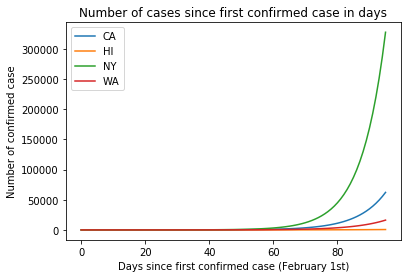

In [383]:
import matplotlib.pyplot as plt

state = {
    "CA": 4,
    "HI": 10,
    "NY": 31,
    "WA": 46
}

daily_cases = []
for rate in [target[state["CA"]], target[state["HI"]], target[state["NY"]], target[state["WA"]]]:
    daily_cases.append([rate ** i for i in range(1, d+1)])

state_names = list(state.keys())    

for i in range(len(daily_cases)):
    plt.plot(daily_cases[i], label=state_names[i])

plt.title("Number of cases since first confirmed case in days")
plt.xlabel("Days since first confirmed case (February 1st)")
plt.ylabel("Number of confirmed case")
plt.legend()
plt.show()

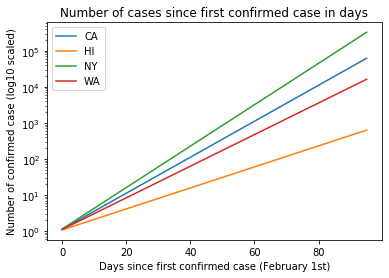

In [387]:
for i in range(len(daily_cases)):
    plt.plot(daily_cases[i], label=state_names[i])

plt.yscale("log")
plt.title("Number of cases since first confirmed case in days")
plt.xlabel("Days since first confirmed case (February 1st)")
plt.ylabel("Number of confirmed case (log10 scaled)")
plt.legend()
plt.show()

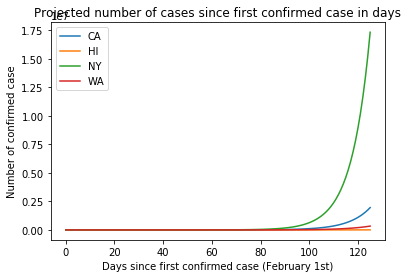

In [390]:
d_prime = d + 30
daily_cases = []
for rate in [target[state["CA"]], target[state["HI"]], target[state["NY"]], target[state["WA"]]]:
    daily_cases.append([rate ** i for i in range(1, d_prime+1)])
    
for i in range(len(daily_cases)):
    plt.plot(daily_cases[i], label=state_names[i])

plt.title("Projected number of cases since first confirmed case in days")
plt.xlabel("Days since first confirmed case (February 1st)")
plt.ylabel("Number of confirmed case")
plt.legend()
plt.show()

As mentioned previous, exponential growth does not truly represent the growth of COVID-19 - exponential growth models the initial growth of the spread of a virus.  An interesting milestone of a growth factor is when it 